In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

I use "task" to refer to a test within each experiment instance. I use "trial" to refer to an experiment instance. I ran 10 trials of the experiment,each with 10 tasks(blue v. orange/ f v. j) presented. 

In [20]:
path_base = 'data/trial_'
num_trials = 10
agg_data = []
for file_num in range(1,num_trials+1):
    path = path_base + str(file_num) + '.csv'
    data = pd.read_csv(path, header=0)
    response_data = data[data['task'] == 'response']
    response_data = response_data.loc[:,['time_elapsed','rt','response','correct_response','correct']]
    agg_data.append(response_data)

tasks_per_trial = len(agg_data[0].loc[:,'rt'])

### Does reaction time, on average, change over time? Does practice make subjects faster? 

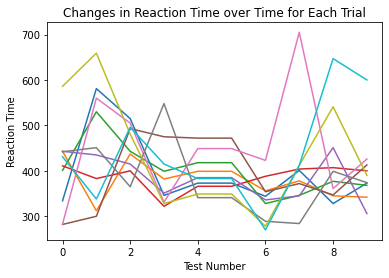

In [45]:
rts = np.empty([num_trials, tasks_per_trial])
correct_rts = []
incorr_rts = []
color_trials = np.empty([num_trials, tasks_per_trial])
acc_mat = np.empty(rts.shape)

for i in range(num_trials):
    data = agg_data[i]
    
    rts[i,:] = np.asarray(data.loc[:,'rt'])
    acc_mat[i,:] = np.asarray(data.loc[:,'correct'])
    color_trials[i,:] = np.asarray(data.loc[:,'correct_response']=='j') #f = 0 = blue, j = 1 = orange
    correct_trials = data[data['correct']]
    incorr_trials = data[data['correct'] == False]
    correct_rts += list(correct_trials.loc[:,'rt'])
    incorr_rts += list(incorr_trials.loc[:,'rt'])
    

plt.plot(rts)
plt.title('Changes in Reaction Time over Time for Each Trial')
plt.xlabel('Test Number')
plt.ylabel('Reaction Time')
plt.show()



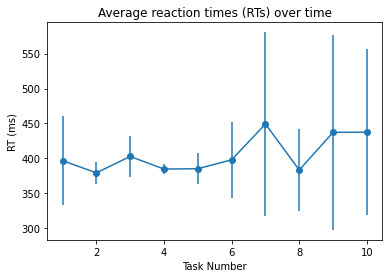

In [22]:
# reaction times over time (w error bars)
rt_means = np.mean(rts,0)
rt_vars = np.var(rts,0)/100

plt.errorbar(x=np.arange(1,num_trials+1),y=rt_means, yerr=rt_vars, fmt='-o', barsabove=True)
plt.title('Average reaction times (RTs) over time')
plt.xlabel('Task Number')
plt.ylabel('RT (ms)')
plt.show()

Error bars are scaled by a factor of 1/100 to visually accommodate for large variances. 

### Does shorter response time mean lower accuracy? 

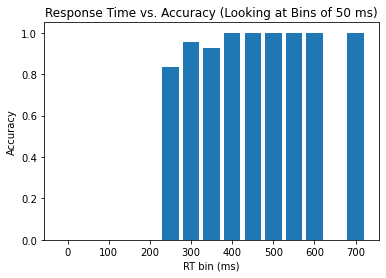

In [94]:
# Response time vs Accuracy 
# bins of 50 ms. 
bin_size = 50
bin_starts = np.arange(0,750,bin_size)
bin_ends = np.arange(0,800,bin_size)
num_correct = np.empty(bin_starts.shape)
num_in_bin = np.empty(bin_starts.shape)

for i in range(len(rts)):
    for j in range(len(rts[0])):
        rt = rts[i,j]
        bin_start = (rt//bin_size)*bin_size
        idx = np.where(bin_starts == bin_start)[0][0]
        num_correct[idx] += acc_mat[i,j]
        num_in_bin[idx] += 1

# for bin_i in num_correct: 
#     if (not(bin_i == 0))
num_correct = num_correct.astype(int)
num_in_bin = num_in_bin.astype(int)

accs = []
for i in range(len(num_correct)):
    if (not (num_in_bin[i] == 0)):
        accs.append(num_correct[i]/num_in_bin[i])
    else: 
        accs.append(0)
plt.bar(bin_starts,accs, width = 0.8*bin_size)
plt.xlabel('RT bin (ms)')
plt.ylabel('Accuracy')
plt.title('Response Time vs. Accuracy (Looking at Bins of ' + str(bin_size) + ' ms)')
plt.show()
        

### What are the average reaction times for correct vs. incorrect responses? Are Incorrect Responses generally associated with a faster reaction time? 

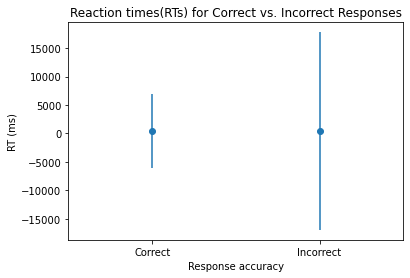

Average Reaction Time for Correct Responses:  405.30526315789473  ms
Average Reaction Time for Incorrect Responses:  407.6  ms


In [98]:
# true vs false avg rxn time (w error bars )
tf_means = [np.mean(np.asarray(correct_rts)), np.mean(np.asarray(incorr_rts))]
tf_vars = [np.var(np.asarray(correct_rts)), np.var(np.asarray(incorr_rts))]
plt.errorbar(x=np.arange(2), y=tf_means, yerr=tf_vars, fmt='o')
plt.xticks(ticks = np.arange(2),labels=['Correct','Incorrect'])
plt.xlabel('Response accuracy')
plt.title('Reaction times(RTs) for Correct vs. Incorrect Responses')
plt.ylabel('RT (ms)')
plt.xlim([-0.5,1.5])
plt.show()
print("Average Reaction Time for Correct Responses: ", tf_means[0], " ms")
print("Average Reaction Time for Incorrect Responses: ", tf_means[1], " ms")

In [ ]:
# reaction times for orange vs blue (RH v LH)
# orange_rts = 
# blue_rts = 
# rseponse time vs accuracy - scatter 


# Modified Experiment # 

Continuous performance test - seeing accuracy and response times for rare stimuli amongst continuous 
Each trial consists of 5 repetitions of a test procedure consisting of 19 trial with a blue stimulus and 1 trial with an orange stimulus (5% chance of seeing an orange (rare) stimulus)

In [100]:
path_base = 'data_CPT/trial_'
num_trials = 10
agg_data = []
for file_num in range(1,num_trials+1):
    path = path_base + str(file_num) + '.csv'
    data = pd.read_csv(path, header=0)
    response_data = data[data['task'] == 'response']
    response_data = response_data.loc[:,['time_elapsed','rt','response','correct_response','correct']]
    agg_data.append(response_data)

tasks_per_trial = len(agg_data[0].loc[:,'rt'])

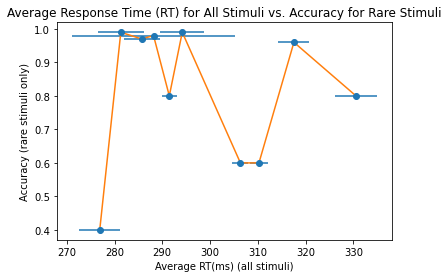

In [106]:
# avg response time vs accuracy for rare stimuli 
# response time vs accuracy 
# avg response time for rare stimuli vs continuous stimuli 
num_rare_per_trial = 5
# for i in range(num_trials):
#     data = agg_data[i]
    
#     rts[i,:] = np.asarray(data.loc[:,'rt'])
#     color_trials[i,:] = np.asarray(data.loc[:,'correct_response']=='j') #f = 0 = blue, j = 1 = orange
#     correct_trials = data[data['correct']]
#     incorr_trials = data[data['correct'] == False]
#     correct_rts += list(correct_trials.loc[:,'rt'])
#     incorr_rts += list(incorr_trials.loc[:,'rt'])

accuracies_rare = []
rts = np.empty([num_trials, tasks_per_trial])
rts_rare = np.empty([num_trials, num_rare_per_trial])
accuracies = np.empty_like(rts)
for i in range(num_trials):
    data = agg_data[i]
    rare_stimuli = data[data['correct_response'] == 'j']
    num_correct = np.sum(np.asarray(data.loc[:,'correct']))
    accuracies_rare.append(num_correct/tasks_per_trial)
    num_correct_rare = np.sum(np.asarray(rare_stimuli.loc[:,'correct']))
    accuracies_rare.append(num_correct_rare/5)
    rts[i,:] = np.asarray(data.loc[:,'rt'])
    accuracies[i,:] = np.asarray(data.loc[:,'correct'])
    rts_rare[i,:] = np.asarray(rare_stimuli.loc[:,'rt'])
    
    
plt.figure()
mean_rts = np.mean(rts,1)
mean_rt_vars = np.var(rts,1)/2000
idx_sort = np.argsort(mean_rts)
mean_rts = mean_rts[idx_sort]
accuracies_rare = np.asarray(accuracies_rare)
accuracies_rare = accuracies_rare[idx_sort]
plt.errorbar(x=mean_rts, y=accuracies_rare, xerr=mean_rt_vars, fmt='o')
plt.plot(mean_rts, accuracies_rare)
plt.title('Average Response Time (RT) for All Stimuli vs. Accuracy for Rare Stimuli')
plt.xlabel('Average RT(ms) (all stimuli)')
plt.ylabel('Accuracy (rare stimuli only)')
plt.show()



In [ ]:
# avg response time for rare stimuli vs continuous stimuli 

Error bars are scaled by a factor of 1/2000 to visually accomodate for large variances. 

Each point represents a trial.

In [ ]:
print(np.sum(np.asarray(agg_data[i].loc[:,'correct'])))

### Impatient Responses

The fastest possible human reaction time (RT) to a visual stimulus is ~120 ms. Anything faster than this is an "impatient response," meaning the subject reacted before processing the visual stimulus. 

In [122]:
print("Percent of Responses that are \"Impatient Responses\": ", 100*np.sum(rts <= 120)/rts.size)
print("Percent Accuracy of \"Impatient Responses\": ", 100*np.sum(accuracies[rts <= 120])/np.sum(rts <= 120))

Percent of Responses that are "Impatient Responses":  1.2
Percent Accuracy of "Impatient Responses":  83.33333333333333


In [117]:
# true vs false avg rxn time (w error bars )
tf_means = [np.mean(np.asarray(correct_rts)), np.mean(np.asarray(incorr_rts))]
tf_vars = [np.var(np.asarray(correct_rts)), np.var(np.asarray(incorr_rts))]
plt.errorbar(x=np.arange(2), y=tf_means, yerr=tf_vars, fmt='o')
plt.xticks(ticks = np.arange(2),labels=['Correct','Incorrect'])
plt.xlabel('Response accuracy')
plt.title('Reaction times(RTs) for Correct vs. Incorrect Responses')
plt.ylabel('RT (ms)')
plt.xlim([-0.5,1.5])
plt.show()
print("Average Reaction Time for Correct Responses: ", tf_means[0], " ms")
print("Average Reaction Time for Incorrect Responses: ", tf_means[1], " ms")

12

In [ ]:
# true v false avg rxn time for both rare and continuous stimuli -> four box plots 